In [1]:
import shap
import joblib
import numpy as np
import pandas as pd
import localmodules.conversor as c

In [2]:
#Definição variáveis iniciais
file = './zDatabase/XAI - Limpo_dummified_minmax_smote.csv'
name = 'XAI - Limpo_dummified_minmax_smote'
tc = 'surgycal margin'
data = pd.read_csv(file,index_col=tc,na_values='',sep=',', decimal='.')
df = pd.DataFrame(data)

In [3]:
#Previsão
#[Age.at.MRI,Prostate.volume,PSA.value.at.MRI,Index.lesion.PIRADS.V2,Index.lesion.size,
# Capsular.contact.lenght_TLC,Smooth.capsular.bulging,Capsular.disruption,Unsharp.margin,
# Irregular.contour,Black.estrition.periprostatic.fat,Retoprostatic.angle.obliteration,
# Measurable.ECE,ECE.in.prostatectomy.specimen_gold.standard,Gleason.score,regra,surgycal margin] L=17
##-----------------------------------------------------------------------------------------------##
#[Age.at.MRI,Prostate.volume,PSA.value.at.MRI,Index.lesion.size,Capsular.contact.lenght_TLC,
# Smooth.capsular.bulging,Capsular.disruption,Unsharp.margin,Irregular.contour,Black.estrition.periprostatic.fat,
# Retoprostatic.angle.obliteration,Measurable.ECE,ECE.in.prostatectomy.specimen_gold.standard,Gleason.score
# regra,Index.lesion.PIRADS.V2_3,Index.lesion.PIRADS.V2_4,Index.lesion.PIRADS.V2_5,surgycal margin] L=19

rfb = joblib.load('randomforests.joblib')

#Conversão -> Transformação valor na posição [3] para 
col = ['Age.at.MRI','Prostate.volume','PSA.value.at.MRI','Index.lesion.size',
       'Capsular.contact.lenght_TLC','Smooth.capsular.bulging','Capsular.disruption','Unsharp.margin',
       'Irregular.contour','Black.estrition.periprostatic.fat','Retoprostatic.angle.obliteration',
       'Measurable.ECE','ECE.in.prostatectomy.specimen_gold.standard','Gleason.score','regra',
       'Index.lesion.PIRADS.V2_3','Index.lesion.PIRADS.V2_4','Index.lesion.PIRADS.V2_5','surgycal margin']
X = [0.444078947,0.2,0.352631579,0.37037037,0.05,0,0,0,0,0,0,0,0,0,1,0,0,1,0]
XX = c.dumm(X)
XXX = c.minmax(XX,data)
XXX.pop(-1)
Y = [XXX]

pred = rfb.predict(Y)
print("Input=%s, Predicted=%s" % (Y, pred))

Input=[[0.444078947, 0.2, 0.352631579, 0.05, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], Predicted=[0]


(2, 162, 18)


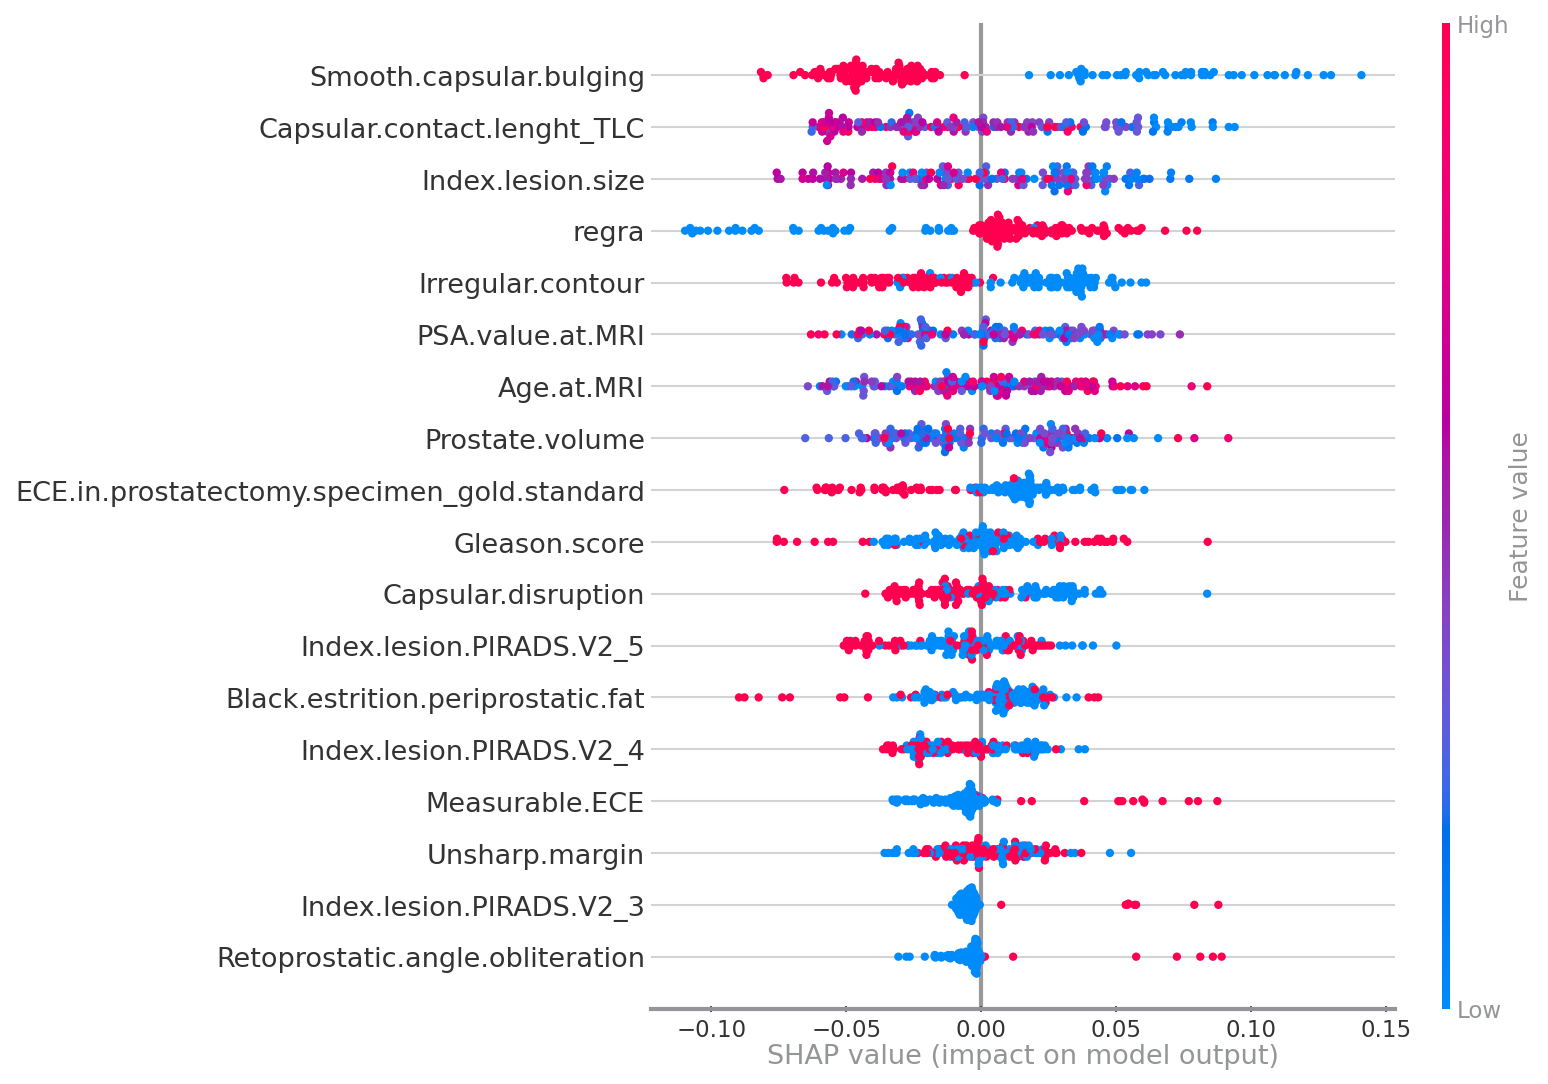

(2, 162, 18)


In [22]:
shap.initjs()
# use Kernel SHAP to explain test set predictions
explainer = shap.TreeExplainer(rfb)
shap_values = np.array(explainer.shap_values(df))
print(shap_values.shape)

shap_values_ = shap_values.transpose((1,0,2))

np.allclose(
    rfb.predict_proba(df),
    shap_values_.sum(2) + explainer.expected_value
)

shap.summary_plot(shap_values[0],df)
print(shap_values.shape)

In [23]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], df.iloc[0,:])

In [24]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], df.iloc[:1000,:])